# LSN: Esercitazione 4

## Esercizio 04.1

L'obiettivo della esercitazione di oggi è utilizzare e modificare un codice di dinamica molecolare che ci viene fornito e studiare l'Argon sotto l'effetto di un potenziale di Lennard-Jones.

1) Nella prima parte di questo esercizio abbiamo implementato la possibilità di ricominciare la simulazione di dinamica molecolare, leggendo da file non solo la configurazione $\vec{r}(t)$ al tempo $t$ (scritta nel file <font face="Courier" size=3>config.final</font>), ma anche la configurazione $\vec r(t-dt)$ allo step precedente (presente nel file <font face="Courier" size=3>old.final</font>) e con queste calcoleremo $\vec r(t+dt)$.
In <font face="Courier" size=3>input.dat</font> abbiamo inserito un altro valore (che nel codice verrà assegnato alla variabile <i>restart</i>) che può valere $1$ o $0$. Se vale $1$ significa che vogliamo ripartire da una simulazione precedente (e quindi considereremo entrambi i file <font face="Courier" size=3>config.0</font> e <font face="Courier" size=3>old.0</font> in cui avremo copiato le configurazioni finali della simulazione precedente). Se invece vale $0$ vogliamo iniziare la nostra simulazione dal tempo iniziale (e quindi saremo interessati solo al file <font face="Courier" size=3>config.0</font>).

2) Nella seconda parte abbiamo inserito nel codice la possibilità di riscalare le velocità in modo che il sistema raggiunga la temperatura desiderata.

Il fattore di riscalamento ($fs$) della velocità lo abbiamo ottenuto calcolando la temperatura

$$T(t+dt/2)=\frac{\sum_{i=1}^N \mid\vec{v}_i(t+dt/2)\mid^2}{3N}$$

dove $N$ è il numero di particelle la cui dinamica viene considerata e $\vec{v}_i$ è la velocità di ognuna di esse. La velocità al tempo $t+dt/2$ viene calcolata utilizzando gli sviluppi di Taylor di $\vec r(t+dt)$ e $\vec r(t)$ intorno a $t+dt/2$ e, invertendo questi sviluppi, otteniamo:

$$\vec v(t+dt/2) =\frac{\vec r(t+dt)-\vec r(t)}{dt}$$


Il fattore di riscalamento vale quindi

$$fs=\sqrt\frac{3T^*}{3T(t+dt/2)} = \sqrt\frac{T^*}{T(t+dt/2)}$$

dove $T^*$ è la temperatura desiderata (contenuta nel file <font face="Courier" size=3>input.dat</font>).

3) In questa ultima parte abbiamo compiuto delle simulazioni per mostrare che, dopo averne lanciate alcune i valori della temperatura, dell'energia cinetica, di quella potenziale e dell'energia totale raggiungono l'equilibrio sin dall'inizio.

Nella prima delle immagini riportate qui sotto si può osservare che, partendo da una configurazione fcc e utilizzando come input i dati relativi alla **fase solida** ($\rho^*=1.1,T^*=1.4$), i valori termodinamici citati poco sopra si stabilizzano abbastanza velocemente, ma compiono comunque un grande salto all'inizio della simulazione. Il valore della temperatura che abbiamo utilizzato come input vale (in unità di Lennard-Jones) $T^*=1.4$; il sistema che ha raggiunto l'equilibrio ha un valore della temperatura che si assesta attorno a $0.8$ come mostra la figura.

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.rc('axes', labelsize=14)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)    # fontsize of the legend

In [3]:
import subprocess

subprocess.call("./clean.sh", shell=True)
subprocess.call("make", shell=True)
subprocess.call("cp config.fcc config.0", shell=True)
subprocess.call("cp input.solid_OLD input.dat", shell=True)
subprocess.call("./MolDyn_NVE.exe")

subprocess.call("mv -t Data/Es_4.1/Non_Eq output_etot.dat output_epot.dat output_ekin.dat output_temp.dat", shell = True)

print("Codice eseguito!")

Codice eseguito!


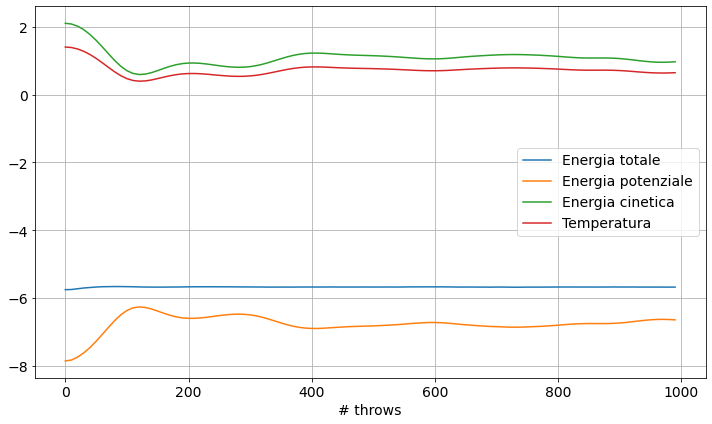

In [4]:
plt.subplots(figsize = (10,6))
nomi_file = ['./Data/Es_4.1/Non_Eq/output_etot.dat', './Data/Es_4.1/Non_Eq/output_epot.dat',
             './Data/Es_4.1/Non_Eq/output_ekin.dat','./Data/Es_4.1/Non_Eq/output_temp.dat']
labels = ['Energia totale', 'Energia potenziale', 'Energia cinetica', 'Temperatura']


# Grafici
for i in range(4):
    file = nomi_file[i]
    var = np.loadtxt(nomi_file[i])
    x = np.arange(len(var)) * 10
    plt.plot(x, var, label = labels[i])
    plt.xlabel('# throws')

plt.grid(True)
plt.legend(loc=5)
plt.tight_layout()
plt.show()

Nella figura sottostante mostriamo invece come, dopo aver fatto ripartire il programma 5 volte utilizzando i dati delle simulazioni precedenti, i valori della temperatura e delle energie sono stabili (a meno di fluttuazioni) attorno a un valore medio fin dall'inizio della simulazione. In particolare la temperatura ha lo stesso valore di quella riportata nel file di input ($T^*=1.4$). Questo fatto è molto utile perchè ci consente di fissare la temperatura desiderata già nel file di input (la versione iniziale di questo codice non ci forniva questa possibilità e dovevamo invece "indovinare" la temperatura iniziale che sarebbe poi decaduta a quella desiderata dopo pochi step). 

In [5]:
def replace_line(file_name, line_num, text):
    # Apro il file e leggo tutti i dati
    with open(file_name, 'r') as file:
        data = file.readlines()

    # Sostituisco la riga interessata
    data[line_num] = text

    # Riscrivo il file con le righe aggiornate
    with open(file_name, 'w') as file:
        file.writelines(data)

replace_line('input.dat', 7, '1\n')

for i in range(4):
    subprocess.call("cp config.final config.0", shell = True)
    subprocess.call("cp old.final old.0", shell = True)
    subprocess.call("./MolDyn_NVE.exe")
    
subprocess.call("./clean.sh", shell = True)

subprocess.call("cp config.final config.0", shell = True)
subprocess.call("cp old.final old.0", shell = True)
subprocess.call("./MolDyn_NVE.exe")

subprocess.call("mv -t Data/Es_4.1/Eq output_etot.dat output_epot.dat output_ekin.dat output_temp.dat", shell = True)

print("Codice eseguito!")

Codice eseguito!


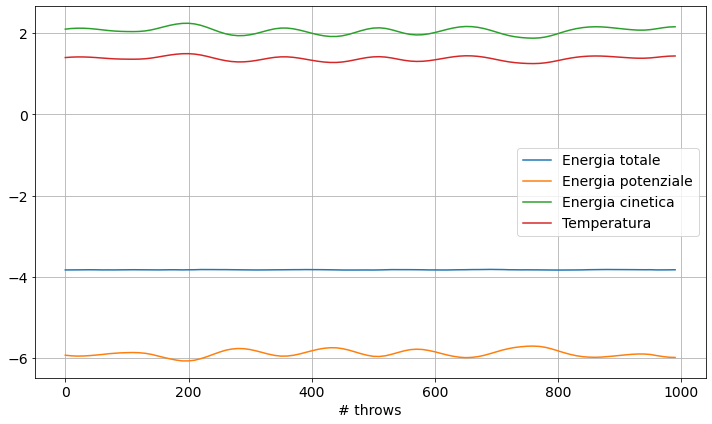

In [6]:
plt.subplots(figsize = (10,6))
nomi_file = ['./Data/Es_4.1/Eq/output_etot.dat', './Data/Es_4.1/Eq/output_epot.dat',
             './Data/Es_4.1/Eq/output_ekin.dat','./Data/Es_4.1/Eq/output_temp.dat']
labels = ['Energia totale', 'Energia potenziale', 'Energia cinetica', 'Temperatura']


# Grafici
for i in range(4):
    file = nomi_file[i]
    var = np.loadtxt(nomi_file[i])
    x = np.arange(len(var)) * 10
    plt.plot(x, var, label = labels[i])
    plt.xlabel('# throws')

plt.grid(True)
plt.legend(loc=5)
plt.tight_layout()
plt.show()

## Esercizio 04.2

In questo esercizio abbiamo implementato il data blocking al codice di dinamica molecolare. A livello pratico abbiamo diviso i $10^4$ step in $100$ blocchi e in seguito calcolato la media e l'incertezza statistica delle grandezze di interesse al crescere del numero di blocchi considerati. Per ogni simulazione vengono quindi creati quattro file, uno per ogni grandezza, che ne contengono il valore medio e la deviazione standard della media. Plottando questi valori per le quattro grandezze otteniamo dei grafici che vanno a stabilizzarsi attorno ai valori presenti nei grafici del primo esercizio.

**N.B.**: i grafici qui presentati sono relativi al sistema dopo che è stato fatto ripartire 5 volte, partendo dalla configurazione FCC, con temperatura in input $T=1.4$ e densità $\rho=1.1$ (fase solida).

In [7]:
subprocess.call("cp config.fcc config.0", shell=True)
subprocess.call("cp input.solid_OLD input.dat", shell=True)

subprocess.call("./MolDyn_NVE.exe")

replace_line('input.dat', 7, '1\n')

for i in range(4):
    subprocess.call("cp config.final config.0", shell = True)
    subprocess.call("cp old.final old.0", shell = True)
    subprocess.call("./MolDyn_NVE.exe")
    
replace_line('input.dat', 5, '10000\n')
subprocess.call("cp config.final config.0", shell = True)
subprocess.call("cp old.final old.0", shell = True)
subprocess.call("./MolDyn_NVE.exe")

subprocess.call("mv -t Data/Es_4.2 ave_etot.out ave_epot.out ave_ekin.out ave_temp.out", shell = True)

print("Codice eseguito!")

Codice eseguito!


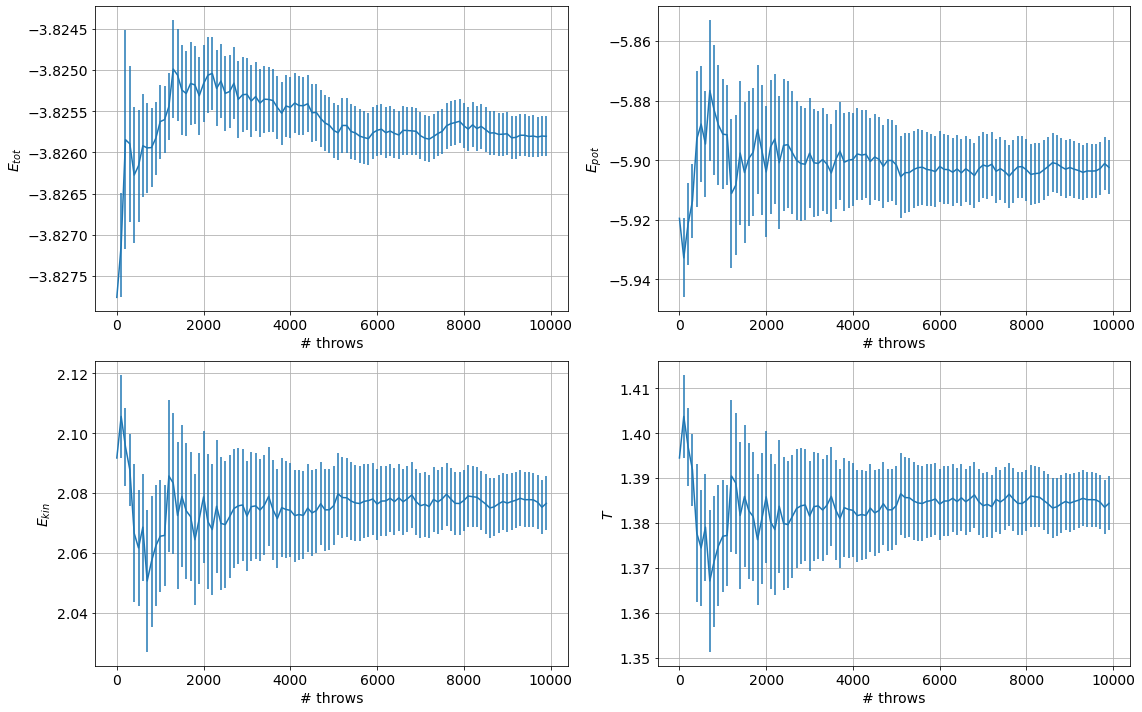

In [8]:
plt.subplots(figsize = (16,10))
nomi_file = ['./Data/Es_4.2/ave_etot.out', './Data/Es_4.2/ave_epot.out',
             './Data/Es_4.2/ave_ekin.out','./Data/Es_4.2/ave_temp.out']
ylabels = [r'$E_{tot}$', r'$E_{pot}$', r'$E_{kin}$', r'$T$']


# Grafici
for i in range(4):
    plt.subplot(2,2,i+1)
    file = nomi_file[i]
    var, err =((np.genfromtxt(file, usecols=i, autostrip=True)) for i in range(2))
    x = np.arange(len(var)) * 100
    plt.errorbar(x, var, yerr=err)
    plt.xlabel('# throws')
    plt.ylabel(ylabels[i])
    plt.grid(True)

plt.tight_layout()
plt.show()

## Esercizio 04.3

Nel terzo esercizio abbiamo simulato la fase solida, liquida e gassosa (ovviamente utilizzando un potenziale di Lennard-Jones) dell'Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu).

Le condizioni utilizzate (presenti rispettivamente nei file <font face="Courier" size=3>input.solid</font>, <font face="Courier" size=3>input.liquid</font> e <font face="Courier" size=3>input.gas</font>) sono le seguenti:

1) fase solida: $\rho^* = 1.1$, $T^* = 0.8$, $r_c = 2.2$

2) fase liquida: $\rho^* = 0.8$, $T^* = 1.1$, $r_c = 2.5$

3) fase gassosa: $\rho^* = 0.05$, $T^* = 1.2$, $r_c = 5.0$

In tutti e tre i casi abbiamo considerato un numero di particelle $n_\text{part}=108$, un intervallo temporale $dt=5*10^{-4}$ (circa uguale a un decimo di femtometro in unità SI) e $10^4$ step temporali.

I grafici richiesti sono quelli di $E/N$, $U/N$, $K/N$ e $T$ con le rispettive incertezze in unità SI. Le grandezze, in relazioni ai valori in unità LJ sono quindi:

$$E = \epsilon E^*,\sigma_E = \frac{\partial E}{\partial E^*}\sigma_E^*=\epsilon\sigma_E^*$$
Queste relazioni valgono ovviamente anche per le energie cinetica e potenziale. Per quanto riguarda la temperatura abbiamo $$T=\frac{\epsilon}{k_b}T^*,\sigma_T=\frac{\epsilon}{k_b}\sigma_T^*$$

Nei grafici sottostanti mostriamo il comportamento relativo alla **fase solida**. Il primo plot mostra che la temperatura si stabilizza attorno alla temperatura target ($T^*=0.8$) dopo aver fatto ripartire la simulazione 5 volte. Abbiamo utilizzato le prime 5 simulazioni per l'equilibrazione più brevi (1000 step) rispetto a quella in cui calcoliamo il valore medio e l'incertezza delle grandezze (10000 step); infatti per le simulazioni iniziali siamo interessati solo al primo step, in cui vengono riscalate le velocità per ottenere una temperatura vicina a quella target.

Dopo aver equilibrato il sistema mostriamo i plot di temperatura, energia totale, potenziale e cinetica. Si può osservare come l'energia totale mostri una buona convergenza (e conservazione). Per quanto riguarda la temperatura, questa si assesta attorno al valore di $93$ K, che è vicino al valore atteso $T=\epsilon/k_bT^*=120*0.8 = 96$ K. In particolare abbiamo un errore relativo $\Delta T/T = \frac{3}{96} \simeq 3\%$

In [9]:
subprocess.call("./clean.sh", shell = True)

subprocess.call("cp config.fcc config.0", shell=True)
subprocess.call("cp input.solid input.dat", shell=True)
subprocess.call("./MolDyn_NVE.exe")

replace_line('input.dat', 7, '1\n')

for i in range(5):
    subprocess.call("cp config.final config.0", shell = True)
    subprocess.call("cp old.final old.0", shell = True)
    subprocess.call("./MolDyn_NVE.exe")
    
replace_line('input.dat', 5, '10000\n')
subprocess.call("cp config.final config.0", shell = True)
subprocess.call("cp old.final old.0", shell = True)
subprocess.call("./MolDyn_NVE.exe")

subprocess.call("mv -t Data/Solid ave_etot.out ave_epot.out ave_ekin.out ave_temp.out output_temp.dat", shell = True)

print("Codice eseguito!")

Codice eseguito!


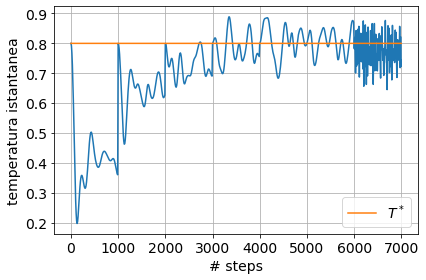

In [10]:
nstep = 100 * 6 + 1000
x = np.append(np.arange(600)*10, np.arange(600*10, 7000))

temp = np.zeros(nstep)

# Carico i dati da file
file_temp = open('./Data/Solid/output_temp.dat', 'r')

for i in range(nstep):
    temp[i] = file_temp.readline()

y = np.linspace(0,7000,nstep)*0 + 0.8


plt.plot(x,temp)
plt.plot(x, y, label =r'$T^*$')
plt.legend(loc=4)

plt.xlabel('# steps')
plt.ylabel('temperatura istantanea')
plt.grid(True)

plt.tight_layout()
plt.draw()

file_temp.close()

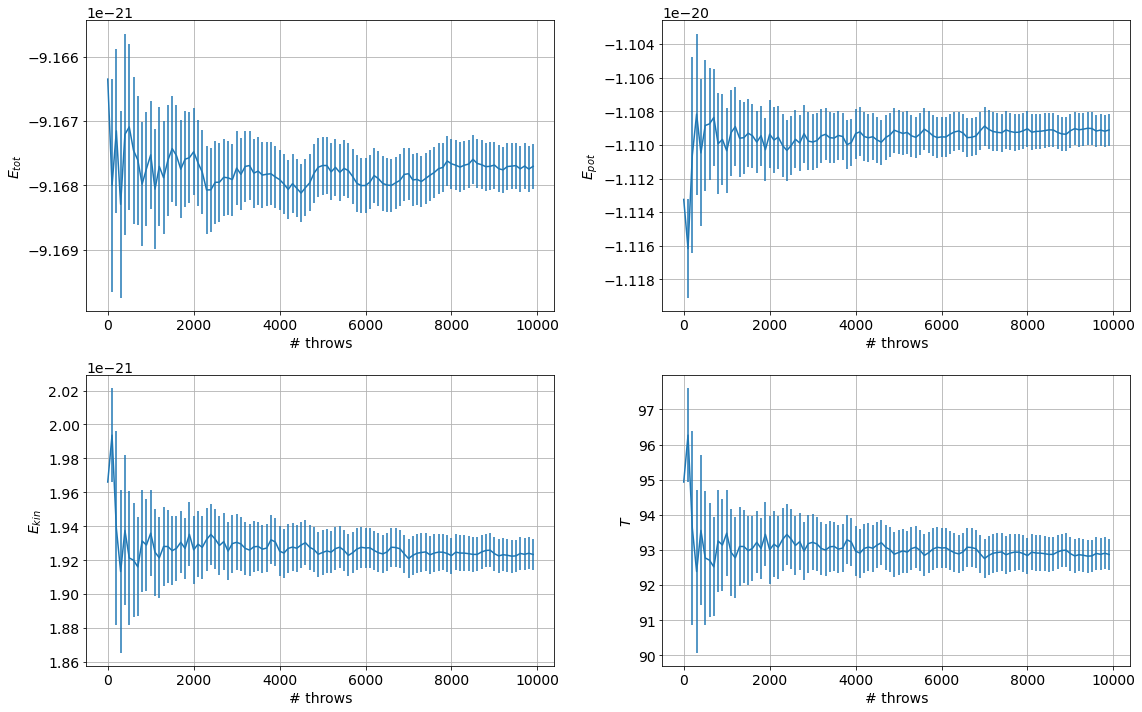

In [11]:
# Fase solida
# Unità SI
k_b = 1.380649 * 10**-23
eps = 120 * k_b
m = 39.948 * 1.66054*10**-27

plt.subplots(figsize = (16,10))
nomi_file = ['./Data/Solid/ave_etot.out', './Data/Solid/ave_epot.out',
             './Data/Solid/ave_ekin.out','./Data/Solid/ave_temp.out']
ylabels = [r'$E_{tot}$', r'$E_{pot}$', r'$E_{kin}$', r'$T$']

SI_Units = [eps, eps, eps, eps/k_b]

# Grafici
for i in range(4):
    plt.subplot(2,2,i+1)
    file = nomi_file[i]
    var, err =((np.genfromtxt(file, usecols=i, autostrip=True)) for i in range(2))
    var *= SI_Units[i]
    err *= SI_Units[i]
    x = np.arange(len(var)) * 100
    plt.errorbar(x, var, yerr=err)
    plt.xlabel('# throws')
    plt.ylabel(ylabels[i])
    plt.grid(True)

plt.tight_layout()
plt.show()

Per quanto riguarda la **fase liquida** abbiamo fatto ripartire il sistema per 5 volte e possiamo notare che anche in questo caso la temperatura si equilibra intorno alla temperatura target, dopo 6000 passi. Anche in questo caso le energie si stabilizzano attorno ad un valore con delle piccole oscillazioni, seppure un po' più vistose rispetto alla fase solida. In particolare l'energia totale oscilla su una scala dieci volte più piccola rispetto ad energia cinetica e potenziale.

In questo caso la temperatura si assesta abbastanza rapidamente attorno al valore $T=127$K. Il valore atteso per la temperatura è $T_{teorico} = 120*1.1=132$K. Quindi sulla temperatura rileviamo un errore relativo $\Delta T/T= \frac{132-127}{132}\simeq4\%$.

In [12]:
subprocess.call("./clean.sh", shell = True)

subprocess.call("cp config.fcc config.0", shell=True)
subprocess.call("cp input.liquid input.dat", shell=True)
subprocess.call("./MolDyn_NVE.exe")

replace_line('input.dat', 7, '1\n')

for i in range(5):
    subprocess.call("cp config.final config.0", shell = True)
    subprocess.call("cp old.final old.0", shell = True)
    subprocess.call("./MolDyn_NVE.exe")
    
replace_line('input.dat', 5, '10000\n')
subprocess.call("cp config.final config.0", shell = True)
subprocess.call("cp old.final old.0", shell = True)
subprocess.call("./MolDyn_NVE.exe")

subprocess.call("mv -t Data/Liquid ave_etot.out ave_epot.out ave_ekin.out ave_temp.out output_temp.dat", shell = True)

print("Codice eseguito!")

Codice eseguito!


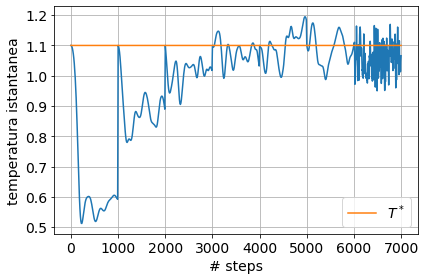

In [13]:
nstep = 100 * 6 + 1000
x = np.append(np.arange(nstep - 1000)*10, np.arange((nstep-1000)*10, (nstep-1000+100)*10))

temp = np.zeros(nstep)

# Carico i dati da file
file_temp = open('./Data/Liquid/output_temp.dat', 'r')

for i in range(nstep):
    temp[i] = file_temp.readline()

y = np.linspace(0,7000,nstep)*0 + 1.1

plt.plot(x,temp)
plt.plot(x, y, label =r'$T^*$')
plt.legend(loc=4)

plt.xlabel('# steps')
plt.ylabel('temperatura istantanea')
plt.grid(True)


plt.tight_layout()
plt.draw()

file_temp.close()

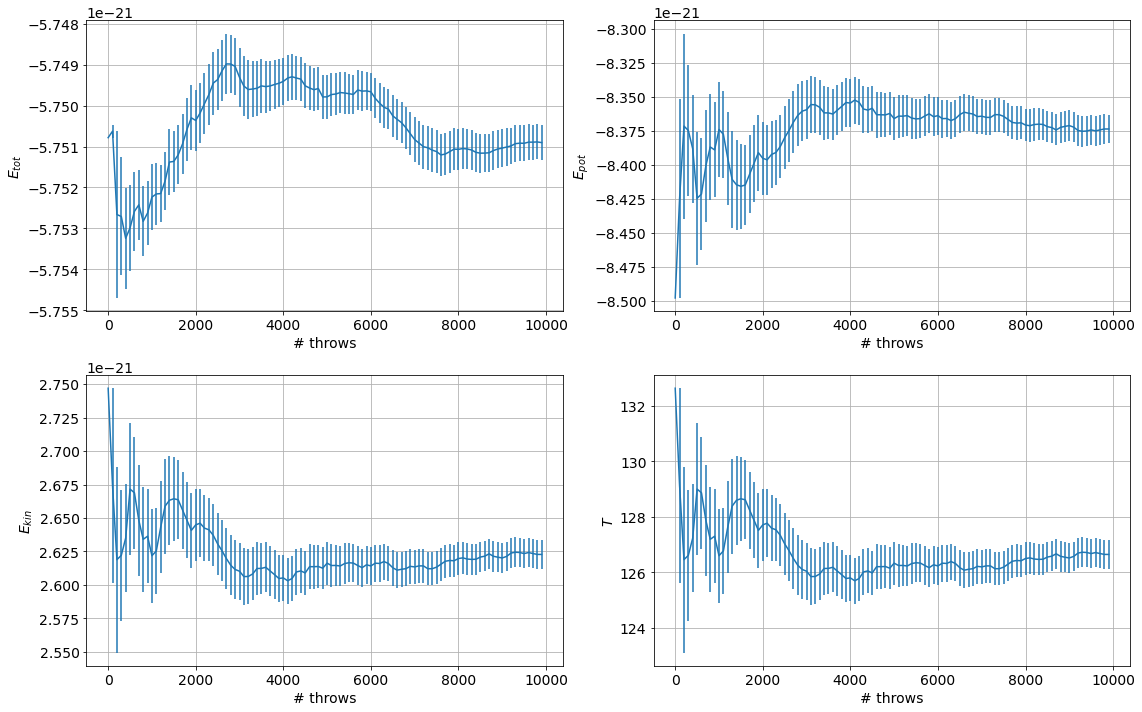

In [14]:
# Fase liquida
plt.subplots(figsize = (16,10))
nomi_file = ['./Data/Liquid/ave_etot.out', './Data/Liquid/ave_epot.out',
             './Data/Liquid/ave_ekin.out','./Data/Liquid/ave_temp.out']
ylabels = [r'$E_{tot}$', r'$E_{pot}$', r'$E_{kin}$', r'$T$']

SI_Units = [eps, eps, eps, eps/k_b]

# Grafici
for i in range(4):
    plt.subplot(2,2,i+1)
    file = nomi_file[i]
    var, err =((np.genfromtxt(file, usecols=i, autostrip=True)) for i in range(2))
    var *= SI_Units[i]
    err *= SI_Units[i]
    x = np.arange(len(var)) * 100
    plt.errorbar(x, var, yerr=err)
    plt.xlabel('# throws')
    plt.ylabel(ylabels[i])
    plt.grid(True)

plt.tight_layout()
plt.show()

La fase gassosa si è dimostrata la più problematica da equilibrare. Per raggiungere una temperatura vicina a $T^*$ abbiamo fatto ripartire il sistema 5 volte prima di fare la simulazione.

Questa volta però, per la prima simulazione non abbiamo utilizzato la temperatura target desiderata, bensì una temperatura più bassa, $T=1.0$. Questa prima simulazione è composta da 10000 passi e questa scelta ha permesso al sistema di raggiungere una temperatura vicina a $T=1.2$ in unità di LJ. Le successive 5 run del codice sono invece composte da 1000 passi (come abbiamo fatto per le fasi solida e liquida) e la temperatura nel file <font face="Courier" size=3>input.dat</font> è pari a $T^*=1.2$.

Nel plot sottostante possiamo vedere come il sistema ha quindi raggiunto la temperatura desiderata dopo questa procedura.

I grafici delle grandezze di interesse mostrano come l'energia totale viene conservata durante la simulazione e che la temperatura assume valori (nonostante delle fluttuazioni) vicini al valore desiderato $T=144$ K.

In [15]:
subprocess.call("./clean.sh", shell = True)

subprocess.call("cp config.fcc config.0", shell=True)
subprocess.call("cp input.gas input.dat", shell=True)
subprocess.call("./MolDyn_NVE.exe")

replace_line('input.dat', 0, '1.2\n')
replace_line('input.dat', 5, '1000\n')
replace_line('input.dat', 7, '1\n')

for i in range(5):
    subprocess.call("cp config.final config.0", shell = True)
    subprocess.call("cp old.final old.0", shell = True)
    subprocess.call("./MolDyn_NVE.exe")
    
replace_line('input.dat', 5, '10000\n')
subprocess.call("cp config.final config.0", shell = True)
subprocess.call("cp old.final old.0", shell = True)
subprocess.call("./MolDyn_NVE.exe")

subprocess.call("mv -t Data/Gas ave_etot.out ave_epot.out ave_ekin.out ave_temp.out output_temp.dat", shell = True)

print("Codice eseguito!")

Codice eseguito!


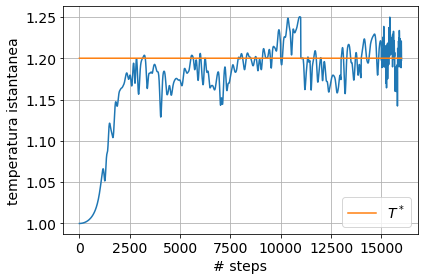

In [16]:
nstep = 1000 + 100 * 5 + 1000
x = np.append(np.arange(nstep - 1000)*10, np.arange((nstep-1000)*10, (nstep-1000+100)*10))

temp = np.zeros(nstep)

# Carico i dati da file
file_temp = open('./Data/Gas/output_temp.dat', 'r')

for i in range(nstep):
    temp[i] = file_temp.readline()

y = np.linspace(0,7000,nstep)*0 + 1.2

plt.plot(x,temp)
plt.plot(x, y, label =r'$T^*$')
plt.legend(loc=4)

plt.xlabel('# steps')
plt.ylabel('temperatura istantanea')
plt.grid(True)


plt.tight_layout()
plt.draw()

file_temp.close()

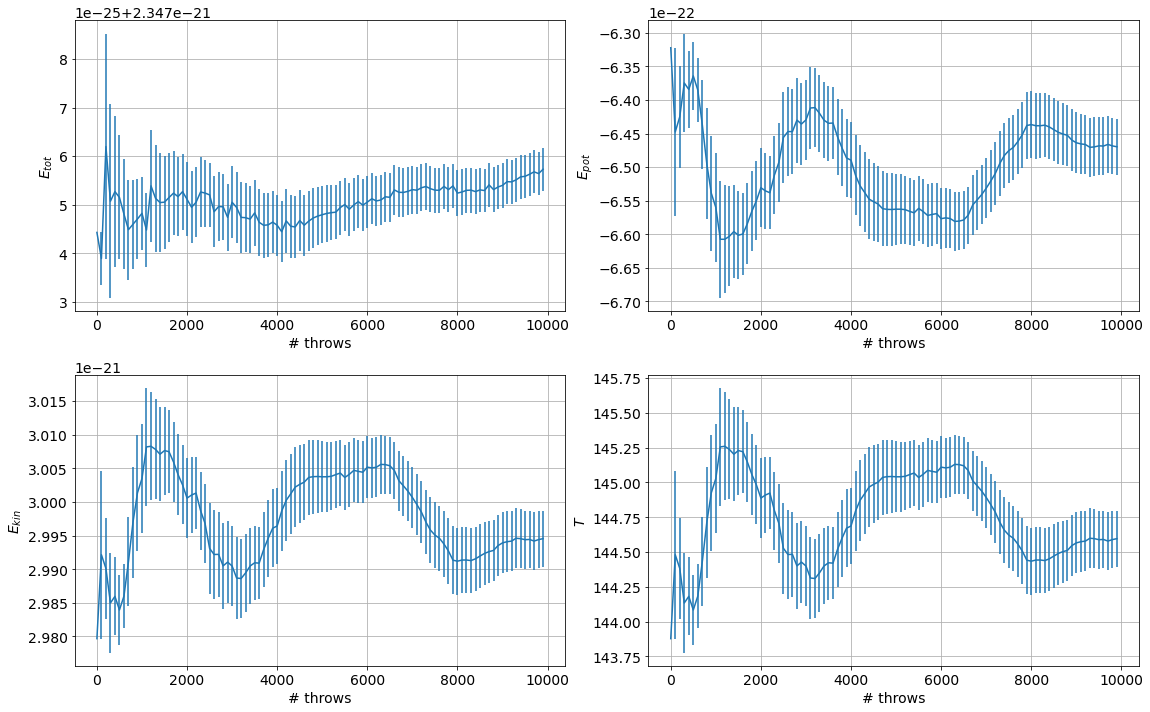

In [17]:
# Fase gassosa
plt.subplots(figsize = (16,10))
nomi_file = ['./Data/Gas/ave_etot.out', './Data/Gas/ave_epot.out',
             './Data/Gas/ave_ekin.out','./Data/Gas/ave_temp.out']
ylabels = [r'$E_{tot}$', r'$E_{pot}$', r'$E_{kin}$', r'$T$']

SI_Units = [eps, eps, eps, eps/k_b]

# Grafici
for i in range(4):
    plt.subplot(2,2,i+1)
    file = nomi_file[i]
    var, err =((np.genfromtxt(file, usecols=i, autostrip=True)) for i in range(2))
    var *= SI_Units[i]
    err *= SI_Units[i]
    x = np.arange(len(var)) * 100
    plt.errorbar(x, var, yerr=err)
    plt.xlabel('# throws')
    plt.ylabel(ylabels[i])
    plt.grid(True)

plt.tight_layout()
plt.show()